# Modelo machine learning - Classificação

**Descrição**
- Modelo machine learning - Anúncios de rede social - Stochastic Gradient Descentt

**Contente**
- Inclui idade e salário estimado do usuário. A coluna comprada indica se o usuário específico com idade e salário estimado comprou o produto ou não ao visualizar os anúncios sociais do produto.

**Resultado**
- 0: não
- 1: sim

In [1]:
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.10


In [2]:
import sklearn
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")

In [3]:
%reload_ext watermark

%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

numpy     : 1.20.2
sklearn   : 0.24.2
matplotlib: 3.3.4
seaborn   : 0.11.1
pandas    : 1.2.4



In [4]:
sns.set_palette("Accent")
sns.set(style = "whitegrid", color_codes = True, font_scale = 1.6)
color = sns.color_palette()

In [5]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [8]:
df.shape

(400, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [10]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [11]:
df.var()

Age                1.098907e+02
EstimatedSalary    1.162603e+09
Purchased          2.302694e-01
dtype: float64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [13]:
df.groupby(["Age"])["Age"].count()

Age
18     5
19     7
20     7
21     4
22     5
23     6
24     9
25     6
26    16
27    13
28    12
29    10
30    11
31    11
32     9
33     9
34     6
35    32
36    12
37    20
38    13
39    15
40    15
41    16
42    16
43     3
44     2
45     7
46    12
47    14
48    14
49    10
50     4
51     3
52     6
53     5
54     4
55     3
56     3
57     5
58     6
59     7
60     7
Name: Age, dtype: int64

In [14]:
df.Age.max()

60

In [15]:
df.Age.min()

18

# **Estatistica Descritiva**

In [16]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [17]:
print(df.Age.count())
print(df.Age.max())
print(df.Age.min())

400
60
18


In [18]:
corr = df.corr()
corr

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


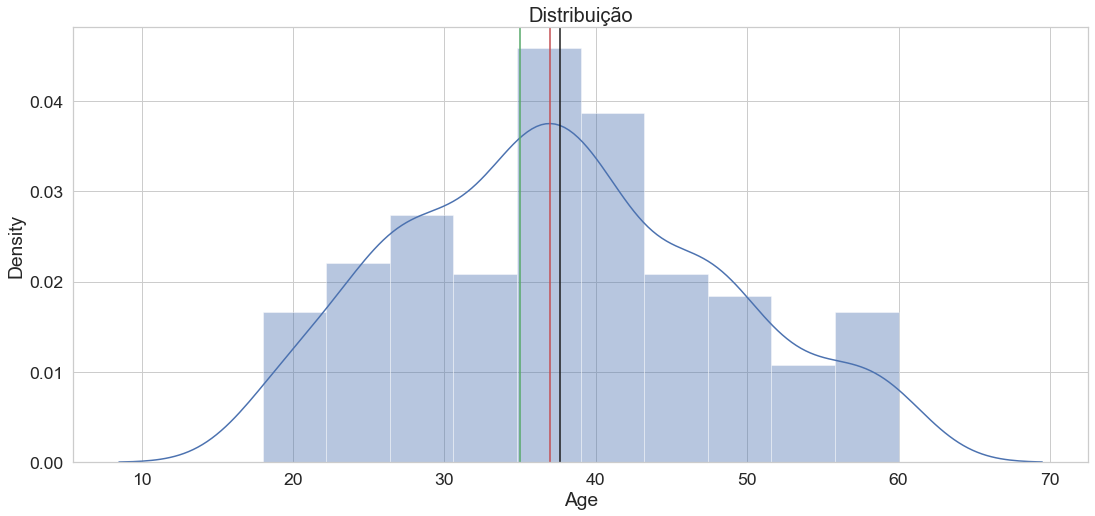

In [19]:
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df['Age']);
plt.title("Distribuição", fontsize=20)
plt.axvline(df['Age'].mean(), color='k')
plt.axvline(df['Age'].median(), color='r')
plt.axvline(df['Age'].mode()[0], color='g');

(3.5, -0.5)

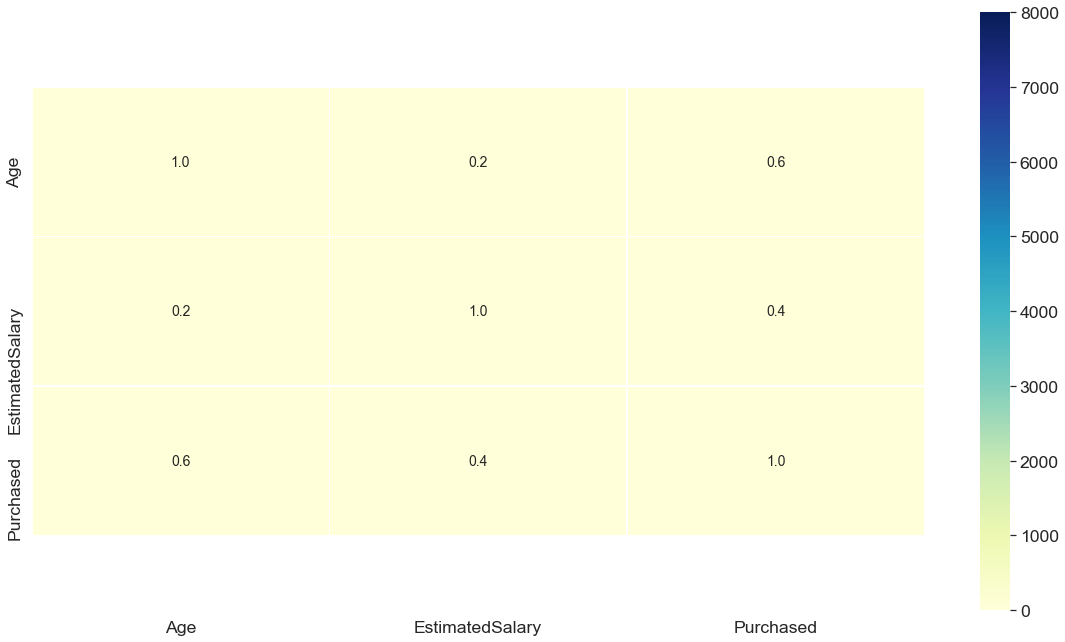

In [20]:
plt.figure(figsize=(20,11))

df_corr = df.corr()
ax = sns.heatmap(df_corr, annot=True, vmin=0, vmax=8000, cmap="YlGnBu", linewidths=.5, annot_kws={'size':14} ,fmt=".1f") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

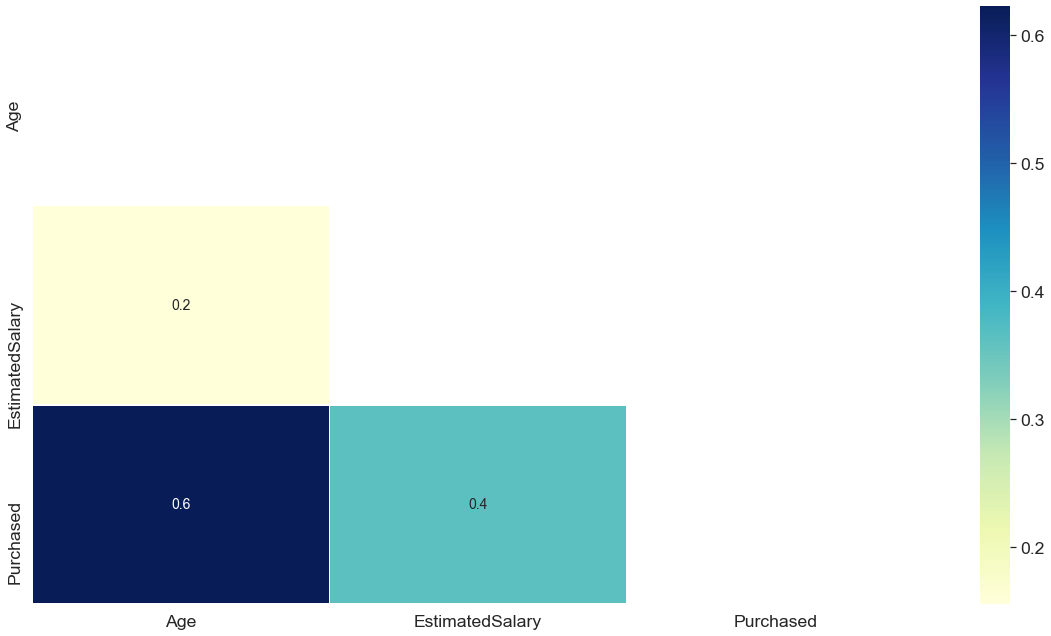

In [21]:
plt.figure(figsize=(20,11))

mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, cmap="YlGnBu", linewidths=.5, annot_kws={'size':14} ,fmt=".1f")
plt.show()

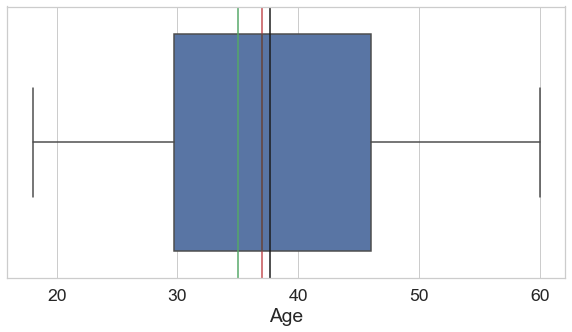

In [55]:
plt.figure(figsize=(10, 5))

ax = sns.boxplot(df["Age"])
plt.axvline(df['Age'].mean(), color='k')
plt.axvline(df['Age'].median(), color='r')
plt.axvline(df['Age'].mode()[0], color='g');

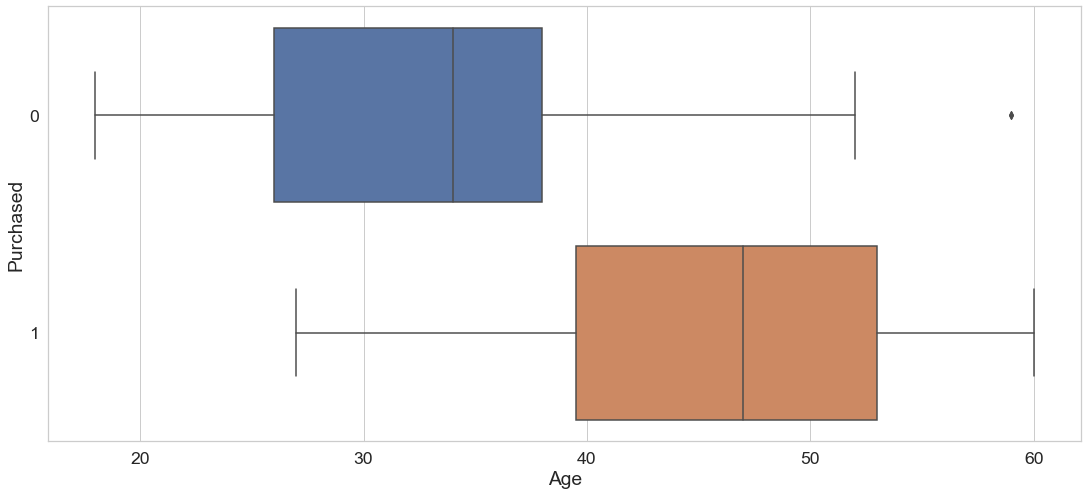

In [59]:
plt.figure(figsize=(18.5, 8))

ax = sns.boxplot(x="Age", y="Purchased", data = df, orient = "h")

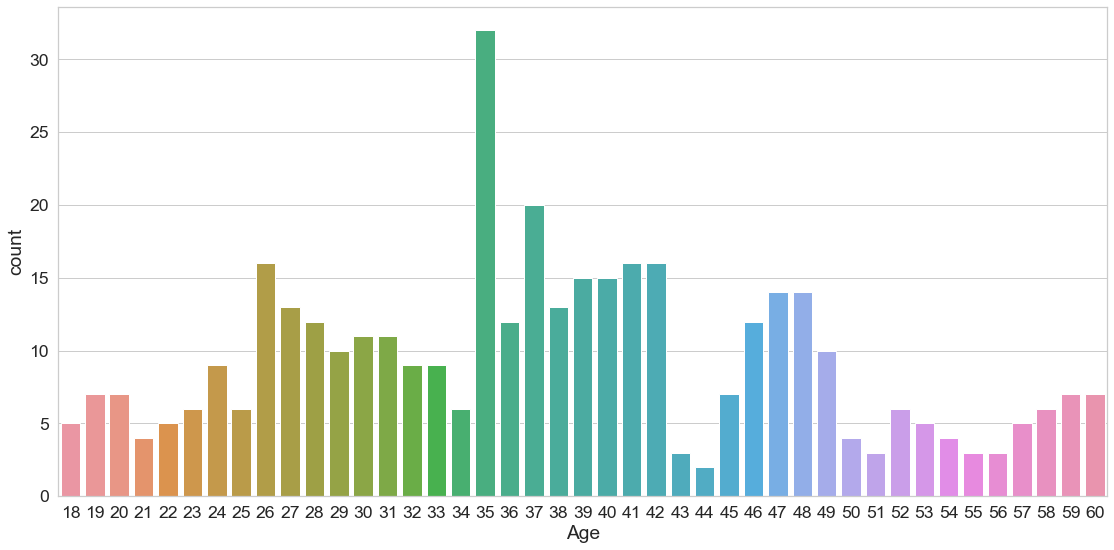

In [24]:
plt.figure(figsize=(18.8, 9))

ax = sns.countplot(df["Age"])

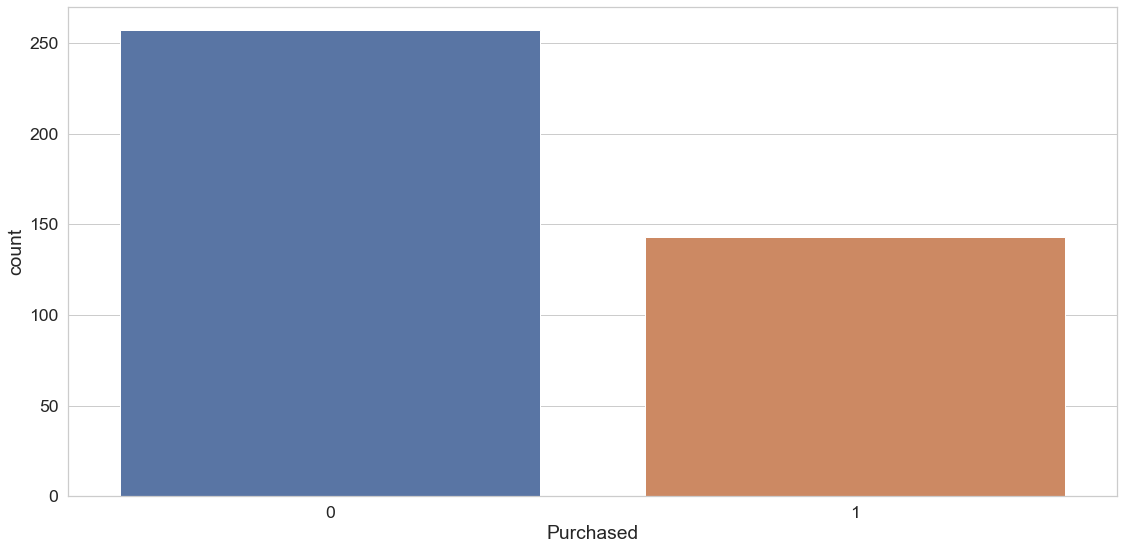

In [25]:
plt.figure(figsize=(18.8, 9))

ax = sns.countplot(df["Purchased"])

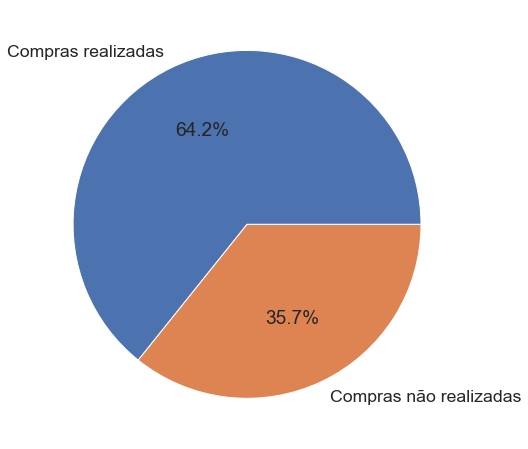

In [26]:
plt.figure(figsize=(15, 8))

plt.pie(df.groupby('Purchased')['Purchased'].count(), labels=['Compras realizadas','Compras não realizadas'], autopct='%1.1f%%');

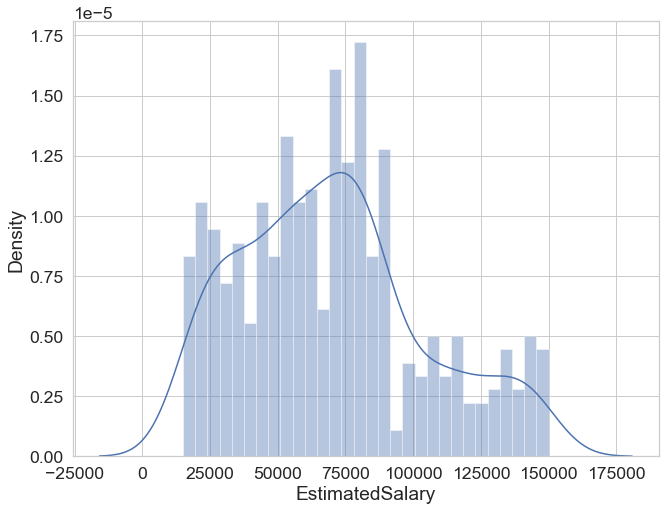

In [27]:
plt.figure(figsize=(10.5, 8))

ax = sns.distplot(df['EstimatedSalary'],bins=30)

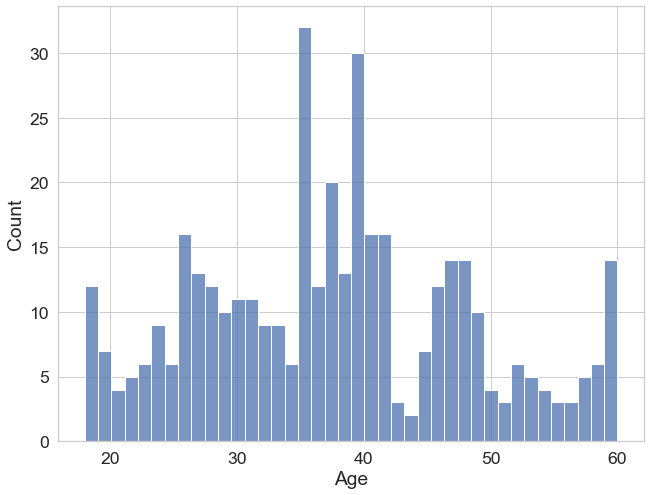

In [28]:
plt.figure(figsize=(10.5, 8))

ax = sns.histplot(df["Age"], bins=40)

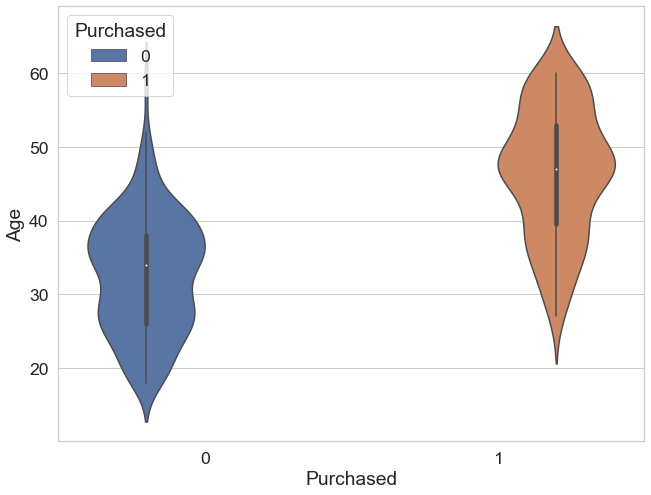

In [29]:
plt.figure(figsize=(10.5, 8))

ax = sns.violinplot(x="Purchased", y="Age", data = df, hue = "Purchased")

<Figure size 756x576 with 0 Axes>

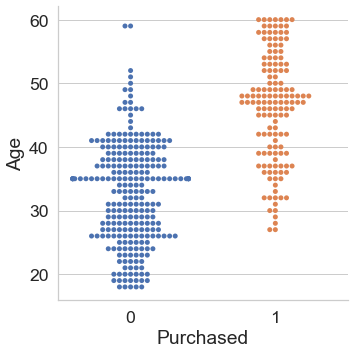

In [30]:
plt.figure(figsize=(10.5, 8))

ax = sns.catplot(x="Purchased", y="Age", data=df, hue="Purchased", kind="swarm")

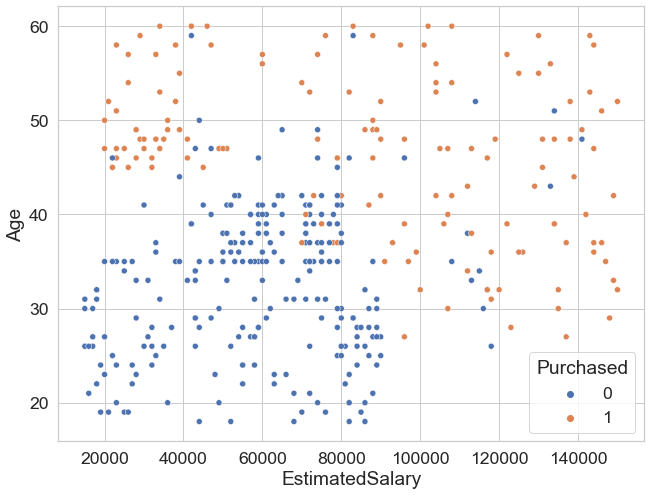

In [31]:
plt.figure(figsize=(10.5, 8))

ax = sns.scatterplot(x="EstimatedSalary", y="Age", data = df, hue="Purchased")

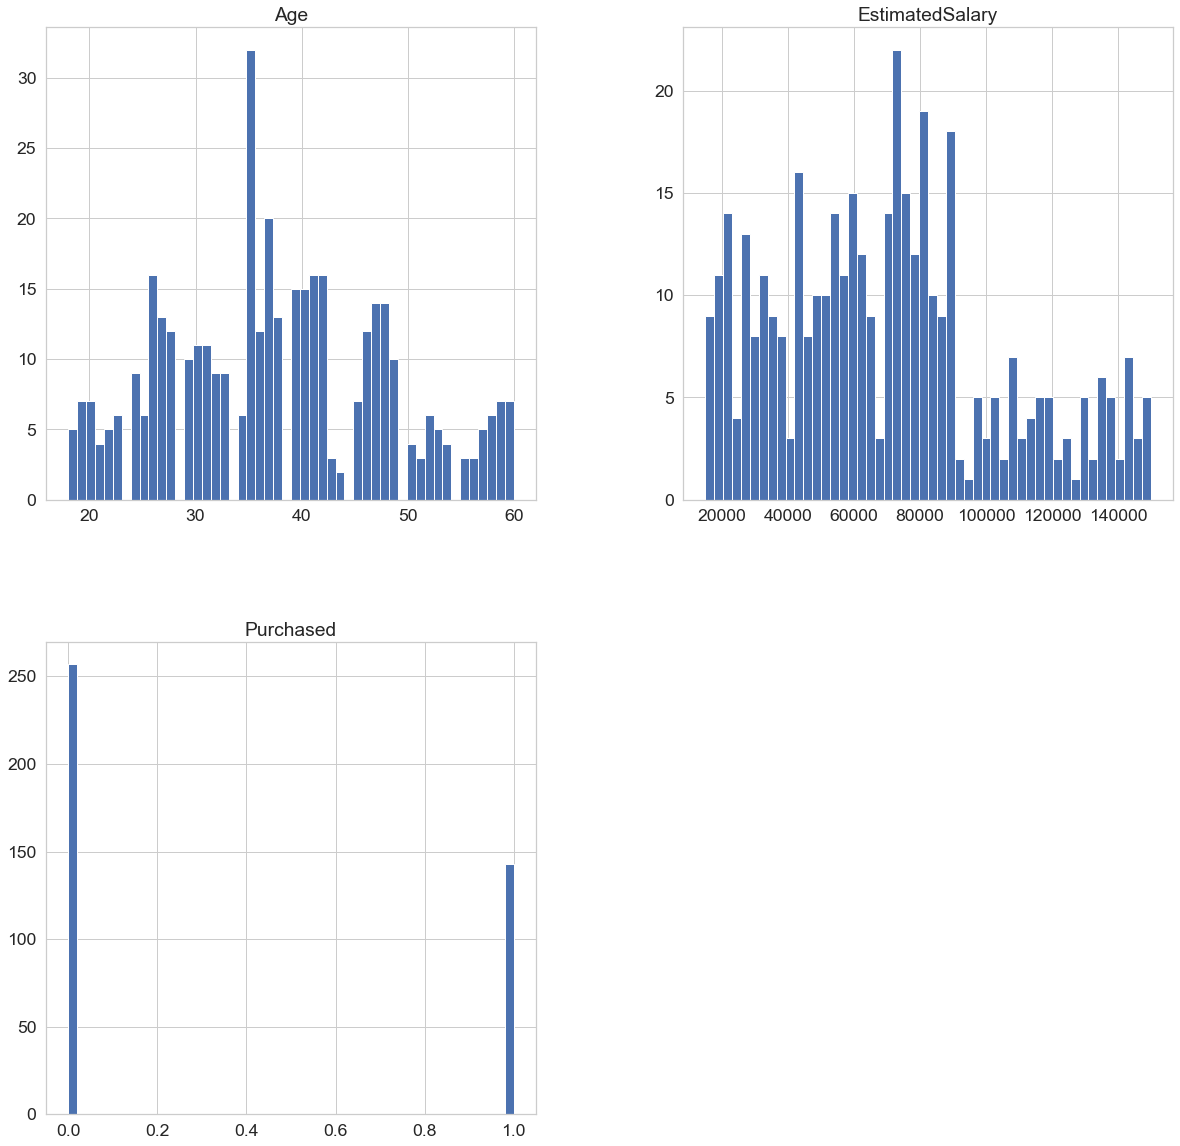

In [32]:
df.hist(bins = 50, figsize=(20.2, 20))
plt.show()

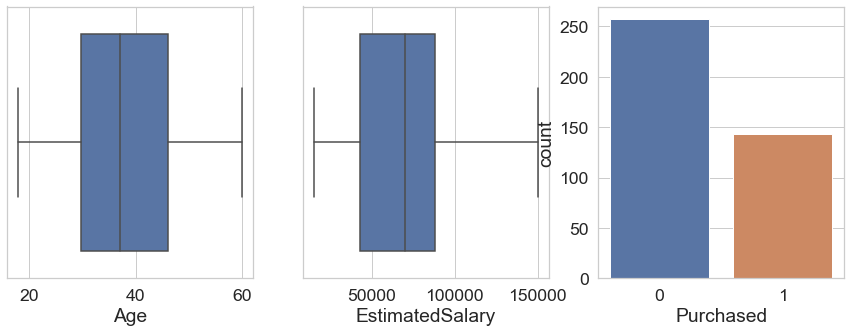

In [35]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

ax = sns.boxplot(x = df["Age"],ax=axis1)
ax = sns.boxplot(x = df["EstimatedSalary"],ax=axis2)
ax = sns.countplot(x = df["Purchased"],ax=axis3)

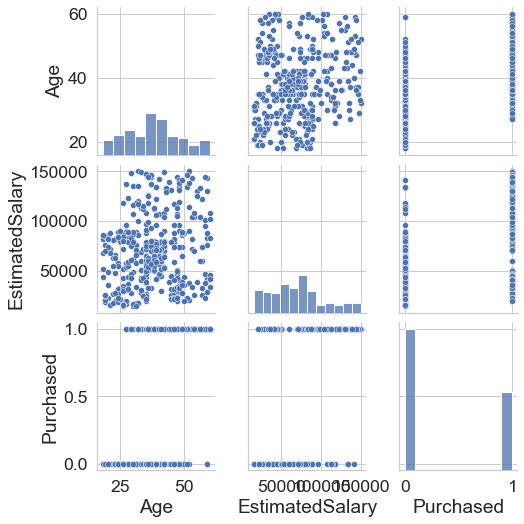

In [36]:
ax = sns.pairplot(df)

# Pré - Processamento

In [37]:
x = df[["EstimatedSalary"]]
y = df["Purchased"]

In [38]:
x.shape

(400, 1)

In [39]:
y.shape

(400,)

In [40]:
from sklearn.preprocessing import StandardScaler

pre_scaler = StandardScaler()
pre_scaler_fit = pre_scaler.fit_transform(x)
pre_scaler_fit

array([[-1.49004624],
       [-1.46068138],
       [-0.78528968],
       [-0.37418169],
       [ 0.18375059],
       [-0.34481683],
       [ 0.41866944],
       [ 2.35674998],
       [-1.07893824],
       [-0.13926283],
       [ 0.30121002],
       [-0.52100597],
       [ 0.47739916],
       [-1.51941109],
       [ 0.35993973],
       [ 0.30121002],
       [-1.3138571 ],
       [-1.28449224],
       [-1.22576253],
       [-1.19639767],
       [-1.40195167],
       [-0.60910054],
       [-0.84401939],
       [-1.40195167],
       [-1.37258681],
       [-1.46068138],
       [-1.22576253],
       [-1.16703281],
       [-0.78528968],
       [-1.51941109],
       [ 0.12502088],
       [ 1.97500684],
       [-1.5781408 ],
       [-0.75592482],
       [ 0.59485858],
       [-1.25512738],
       [-1.22576253],
       [-0.60910054],
       [ 0.06629116],
       [-1.13766796],
       [-1.54877595],
       [-0.55037082],
       [ 1.123426  ],
       [-1.60750566],
       [ 0.41866944],
       [-1

In [41]:
pre_scaler_fit.shape

(400, 1)

# Treino Teste 

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.03, random_state = 0)

In [74]:
x_train.shape

(388, 1)

In [75]:
y_train.shape

(388,)

In [76]:
x_test.shape

(12, 1)

In [77]:
y_test.shape

(12,)

# Modelo de machine learning

- Modelo Stochastic Gradient Descentt

In [78]:
%%time
from sklearn.linear_model import SGDClassifier

model_gradient = SGDClassifier()
model_gradient_fit = model_gradient.fit(x_train, y_train)
model_gradient_score = model_gradient.score(x_train, y_train)
print("Model - Gradient Descentt Stochastic: %.2f" % (model_gradient_score))

Model - Gradient Descentt Stochastic: 0.63
Wall time: 30.9 ms


In [79]:
model_gradient_predict = model_gradient.predict(x_test)
model_gradient_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_gradient = accuracy_score(model_gradient_predict, y_test)
print("Accuracy - Gradient Descentt Stochastic: %.2f" % (accuracy_gradient * 100))

Accuracy - Gradient Descentt Stochastic: 91.67


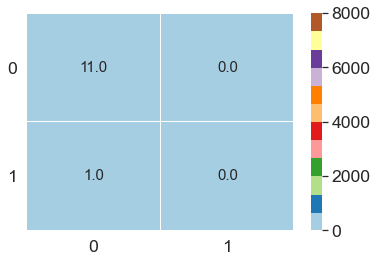

In [82]:
matrix_confusion = confusion_matrix(y_test, model_gradient_predict)

matrix = sns.heatmap(matrix_confusion, vmin=0, vmax=8000, cmap = "Paired", linewidths=.6, annot=True ,annot_kws={'size':15} ,fmt=".1f")
plt.yticks(rotation=0)
plt.show()

In [88]:
from sklearn.metrics import classification_report

report_classification = classification_report(y_test, model_gradient_predict)
print("Model - Gradient Descentt Stochastic")
print()
print(report_classification)

Model - Gradient Descentt Stochastic

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12



In [89]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, model_gradient_predict)
Recall = recall_score(y_test, model_gradient_predict)
Accuracy = accuracy_score(y_test, model_gradient_predict)
F1_Score = f1_score(y_test, model_gradient_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.916667
0,precision,0.000000
1,Recall,0.000000
3,F1_Score,0.000000
